In [368]:
using LinearAlgebra
using Plots
include("./fft.jl")

conv (generic function with 3 methods)

Testing the FFT function

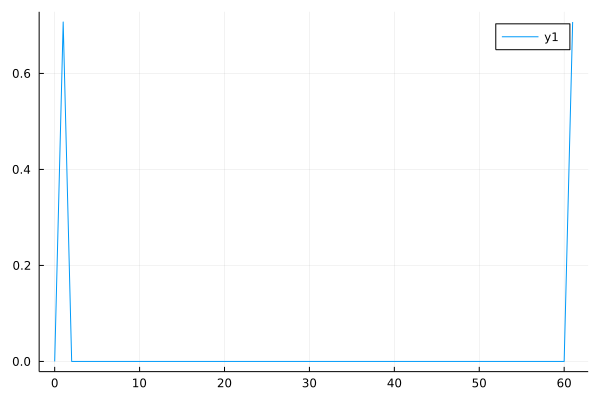

In [360]:
f = x -> sin(x) + cos(x)
n=31
z = range(0, 2π, length=2n+1)[1:end-1]
samples = f.(z)
A = fftmatrix(n)
f̂ = (1 / sqrt(2n)) * A * samples

plot(0:length(f̂)-1, abs.(f̂))

Testing the convolution functions

In [371]:
f = x -> cos(2x)
g = x -> exp(x)
n = 32
z = range(0, 2π, length=2n+1)[1:end-1]
h = conv(f, g, n)
plot(z, abs.(h))

LoadError: InexactError: Float64(80.95958698050931 + 1.3227266504323154e-17im)

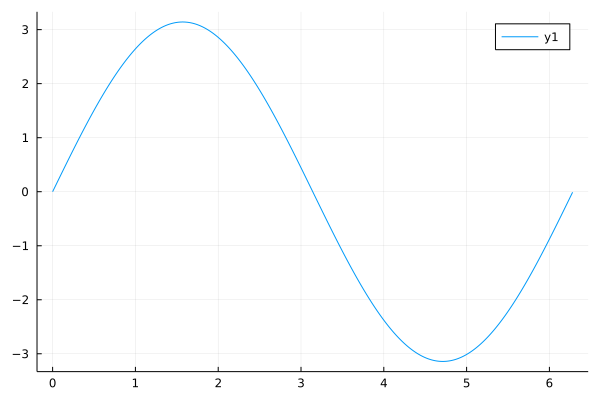

In [326]:
f = x -> sin(x)
g = x -> cos(x)
n = 1000
h = conv(f, g, n)
z = range(0, 2π, length=2n+1)[1:end-1]
plot(z, real.(h))


# findmax(real.(h))[1] - π/2



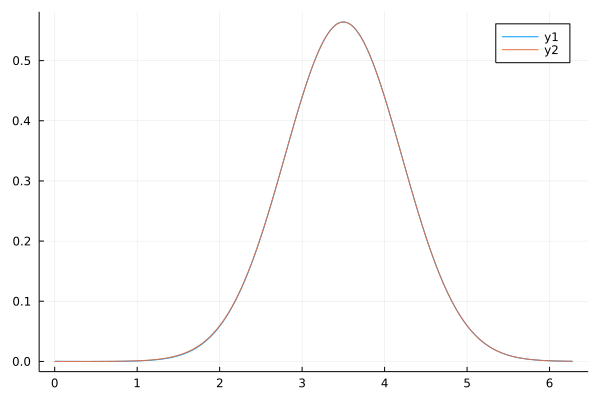

In [327]:
#Generate random data between -2 and 2
n=1000
lower= 0
upper = 2π
# x₁ = 4*(rand(n) .- 0.5)
# x₂ = 4*(rand(n) .- 0.5)

#Get pdf values at  those points and plot them
d₁ = Normal(2, 0.5)
d₂ = Normal(1.5, 0.5)
# d₁ = Normal(0, 1)
# d₂ = Normal(0, 1)

#f_norm = Normal(0, sqrt(2))
f_norm = Normal(3.5, 0.5*sqrt(2))
# y₁ = pdf.(d, x₁)
# y₂ = pdf.(d, x₂)
# scatter(x, y)

norm₁ = x -> pdf(d₁, x)
norm₂ = y -> pdf(d₂, y)

# fourierconv(norm₁, norm₁, n)
z = range(lower, upper, length=2n+1)[1:end-1]

data = abs.(conv(norm₁, norm₂, n, lower=lower, upper=upper))
#data = real.(data)






plot(z, data)
plot!(z, pdf.(f_norm, z))
# scatter(z, norm₁.(z))


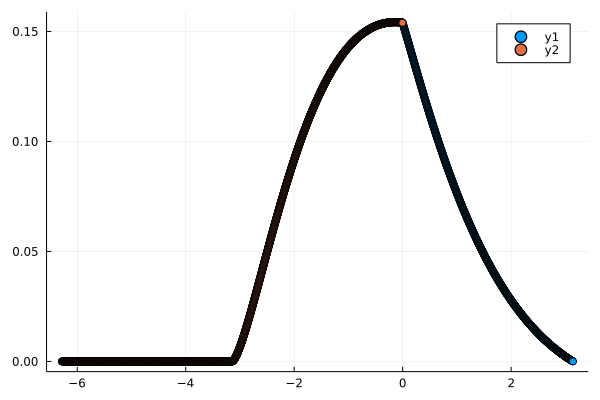

In [350]:
#Generate random data between -2 and 2
n=1000
lower=-π
upper=π
# upper = 10
# x₁ = 4*(rand(n) .- 0.5)
# x₂ = 4*(rand(n) .- 0.5)

#Get pdf values at  those points and plot them
c₁ = Chisq(3)
c₂ = Chisq(2)

f_chi = Chisq(5)
# y₁ = pdf.(d, x₁)
# y₂ = pdf.(d, x₂)
# scatter(x, y)

chi₁ = x -> pdf(c₁, x)
chi₂ = y -> pdf(c₂, y)

# fourierconv(norm₁, norm₁, n)
z = range(-π, π, length=2n+1)[1:end-1]

data = real.(conv(chi₁, chi₂,n, lower=lower, upper=upper))
#data = real.(data)






plot(z, data)
plot!(z .- π, pdf.(f_chi, z))

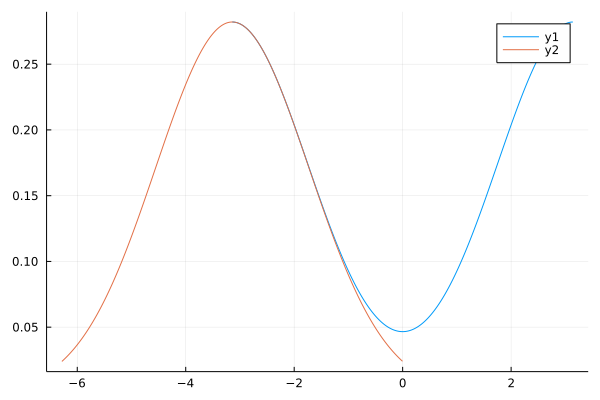

In [353]:
#Generate random data between -2 and 2
n=1000
lower=-π
upper=π
# upper = 10
# x₁ = 4*(rand(n) .- 0.5)
# x₂ = 4*(rand(n) .- 0.5)

#Get pdf values at  those points and plot them
c₁ = Normal(0, 1)
c₂ = Normal(0, 1)

f_chi = Normal(0, sqrt(2))
# y₁ = pdf.(d, x₁)
# y₂ = pdf.(d, x₂)
# scatter(x, y)

chi₁ = x -> pdf(c₁, x)
chi₂ = y -> pdf(c₂, y)

# fourierconv(norm₁, norm₁, n)
z = range(-π, π, length=2n+1)[1:end-1]

data = real.(conv(chi₁, chi₂,n, lower=lower, upper=upper))
#data = real.(data)






plot(z, data)
plot!(z .- π, pdf.(f_chi, z))